# import library

In [2]:
import numpy as np
from scipy.stats import norm
from sklearn import datasets
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
from sklearn import linear_model

# Import ''diabetes''

In [3]:
datasets.load_diabetes()

diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

Each variable is centered and standardized:

In [9]:
print(diabetes_X.sum(axis = 0))
print(np.dot(np.transpose(diabetes_X),diabetes_X))

[ -1.60635394e-13   5.78287418e-14  -3.55604435e-13   5.66491298e-14
  -3.90520949e-14   5.86544702e-14  -2.02199368e-13   1.66956726e-13
  -1.69323756e-13  -1.50849385e-13]
[[ 1.          0.1737371   0.18508467  0.33542671  0.26006082  0.21924314
  -0.07518097  0.2038409   0.27077678  0.30173101]
 [ 0.1737371   1.          0.0881614   0.24101317  0.03527682  0.14263726
  -0.37908963  0.33211509  0.14991756  0.20813322]
 [ 0.18508467  0.0881614   1.          0.39541532  0.24977742  0.26116991
  -0.36681098  0.4138066   0.44615865  0.38867999]
 [ 0.33542671  0.24101317  0.39541532  1.          0.24246971  0.18555783
  -0.17876121  0.25765337  0.39347814  0.39042938]
 [ 0.26006082  0.03527682  0.24977742  0.24246971  1.          0.89666296
   0.05151936  0.54220728  0.51550076  0.32571675]
 [ 0.21924314  0.14263726  0.26116991  0.18555783  0.89666296  1.
  -0.19645512  0.65981689  0.3183534   0.29060038]
 [-0.07518097 -0.37908963 -0.36681098 -0.17876121  0.05151936 -0.19645512
   1.     

# To increase the level of difficulty, we add some (insignificant) Gaussian variable to the database

In [4]:
n = diabetes_X.shape[0]

xadd = np.random.normal(0,1,[n,100])

diabetes_X  = np.column_stack((diabetes_X,xadd))
diabetes_X.shape

(442, 110)

# Now we split the sample in two parts: A training set and a test set 

In [5]:
diabetes_X_learn = diabetes_X[:300]
diabetes_y_learn = diabetes_y[:300]
diabetes_X_test = diabetes_X[301:]
diabetes_y_test = diabetes_y[301:]

diabetes_X_learn.shape ,diabetes_X_test.shape , diabetes_y_learn.shape , diabetes_y_test.shape

((300, 110), (141, 110), (300,), (141,))

OLS with sk learn (we keep in R1 the prediction error computed on the test set)

In [8]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_learn , diabetes_y_learn)

print(regr.coef_)
print(regr.intercept_)

R1 = regr.predict(diabetes_X_test) - diabetes_y_test

[  1.93210086e+00  -1.92742667e+02   6.29311232e+02   2.45838096e+02
  -3.41114987e+02   5.90907047e+01  -5.71816648e+01   1.03335657e+02
   5.70730646e+02   1.53717574e+02   1.96154739e+00  -5.58617278e+00
  -5.14595479e+00   3.86793600e-01   1.40494464e+00  -2.12455323e+00
  -4.63697055e+00  -9.12456753e-01  -9.88101494e+00   1.31788933e+00
   4.78467079e-02  -2.28721562e+00  -6.63796964e+00   5.89563362e+00
  -2.96803423e+00   3.62406120e+00  -2.17548203e+00  -2.05938472e+00
   7.78946262e+00   2.98474698e-01   3.62036692e+00   2.86640091e-01
  -9.36179668e-01   3.80417471e+00   1.97959439e+00   5.01534216e+00
   9.87354883e-01  -3.10487933e+00  -8.70708185e+00   5.60106082e+00
  -2.32184812e+00   8.45416200e+00  -4.97002236e+00  -6.12009698e-01
  -2.80078335e+00  -6.33471534e-01   1.10435440e+00  -1.09171195e+00
  -2.79041103e+00   1.48419036e+00  -3.86228798e+00  -5.12534875e-01
   5.47950590e+00  -3.59580518e+00   1.28772889e+00   3.66810123e-01
   2.36453223e-01  -5.99424521e-01

# A first graph to visualize the residuals

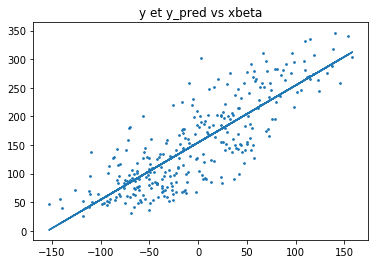

In [9]:
ypred_tmp = np.dot(diabetes_X_learn , regr.coef_ )
ypred = ypred_tmp +  regr.intercept_ 
#ypred = regr.predict(diabetes_X)


plt.figure() 
plt.plot(ypred_tmp , ypred)
plt.scatter(ypred_tmp , diabetes_y_learn , s =3 )
plt.title("y et y_pred vs xbeta")
plt.show()


# Forward variable selection

In [10]:
diabetes_X_aug = np.column_stack( (np.ones( (diabetes_X_learn.shape[0], 1 )), diabetes_X_learn )) 

p = diabetes_X_aug.shape[1]
n = diabetes_X_aug.shape[0]

test = np.zeros((p,p))
pval_mem = np.zeros(p)
pval = np.zeros((p,p))
resids = diabetes_y_learn

var_sel = []
var_remain = list(range(p))
in_test = []


regr = linear_model.LinearRegression(fit_intercept = False)


for k in range(p): 
    resids_mem = np.zeros((p,n))

    for i in var_remain:
        xtmp = diabetes_X_aug [:,[i]]
        regr.fit(xtmp , resids)
        
        #calcul de (x'x)
        xx = np.sum( diabetes_X_aug [:,[i]] ** 2 )    
        resids_mem [i,:] = regr.predict(xtmp) - resids
        sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / xx
        test[k,i] = np.sqrt(n) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
        pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))

    ####separe en deux vecteurs la listes des variables séléctionnées et les autres
    best_var = np.argmax(test[k,:])
    var_sel.append(best_var)
    resids = resids_mem[best_var,:]
    pval_mem [k] = pval[k,best_var]
    var_remain = np.setdiff1d(var_remain,var_sel)



Let us plot the value of the test statistic for the 3 first steps

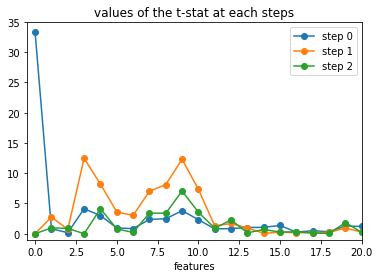

In [12]:
def foo(s1):
    return "step %s" % s1

fig = plt.figure()
for k in range(3): 
    lab_tmp = foo(k)
    plt.plot(np.arange(p),test[k,:], '-o',label = lab_tmp)
    plt.axis(xmin = -.5,xmax = 20,ymin = -1)
plt.legend(loc=1)
plt.title("values of the t-stat at each steps")
plt.xlabel("features")
plt.show()

At each step one may look at the pvalue associated to the selected variable 

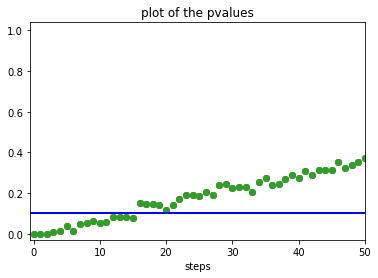

In [19]:
fig2 = plt.figure() 
for k in range(3): 
    plt.plot(np.arange(p),pval_mem, 'o')
    plt.plot([-0.5,50],[.1,.1],color = "blue" )
    plt.axis(xmin = -.5,xmax = 50,ymin = -.03)
plt.title("plot of the pvalues")
plt.xlabel("steps")
plt.show()

# We obtained the following selected variables

In [13]:
print("variables sélectionnées (dans l'ordre): " , 
      np.array(var_sel)[pval_mem<.1])

variables sélectionnées (dans l'ordre):  [ 0  3  9  5 12 95 42 92  4 19 39 29 87  2 89 64 63 81 65]


# Now we can run OLS with the selected variables

In [17]:
sel = np.array(var_sel)[pval_mem<.1]
k = np.count_nonzero(sel)
sel = sel[1:]
X_learn_forward = diabetes_X_learn[:,sel]

regr = linear_model.LinearRegression()
regr.fit(X_learn_forward , diabetes_y_learn)

print(regr.coef_)
print(regr.intercept_)

R2 = regr.predict(  diabetes_X_test[:,sel] )  - diabetes_y_test

[  3.06400628e+02   2.59210480e+02  -3.18443142e+02  -9.75113386e-01
   1.84508380e+00  -4.13195118e+00  -4.88173326e+00   2.07803221e+02
  -1.14000727e+00   5.17959324e+00   3.30770227e+00  -1.78474246e+00
   7.90020547e+02   2.59178254e+00  -6.14400623e+00   5.66162700e+00
   1.69719678e-01   4.10687393e+00]
151.867906545


# Finally, we compare OLS and OLS with forward variable selection according the prediction risk computed on the test set

In [16]:
sum(R1 ** 2 )  , sum ( R2** 2 )

(604906.93348506, 491383.52110588393)